In [1]:
import pandas as pd
users = pd.read_csv('../data/users.csv', parse_dates=['signup_date'])
transactions = pd.read_csv('../data/transactions.csv', parse_dates=['date'])

# Merge datasets
df = transactions.merge(users, on='user_id', how='left')

# Add month column
df['month'] = df['date'].dt.to_period('M')

In [2]:
# Monthly Revenue
mrr = df.groupby('month')['amount'].sum().reset_index()

# New Users per month
new_users = users.groupby(users['signup_date'].dt.to_period('M'))['user_id'].count().reset_index()
new_users.rename(columns={'user_id':'new_users'}, inplace=True)

# Average Revenue Per User (ARPU)
arpu = mrr.copy()
arpu['arpu'] = mrr['amount'] / new_users['new_users'].clip(lower=1)

mrr.head(), new_users.head(), arpu.head()


(     month  amount
 0  2024-10    2154
 1  2024-11    6298
 2  2024-12    6391
 3  2025-01    5817
 4  2025-02    4861,
   signup_date  new_users
 0     2024-10         45
 1     2024-11        170
 2     2024-12        160
 3     2025-01        171
 4     2025-02        170,
      month  amount       arpu
 0  2024-10    2154  47.866667
 1  2024-11    6298  37.047059
 2  2024-12    6391  39.943750
 3  2025-01    5817  34.017544
 4  2025-02    4861  28.594118)

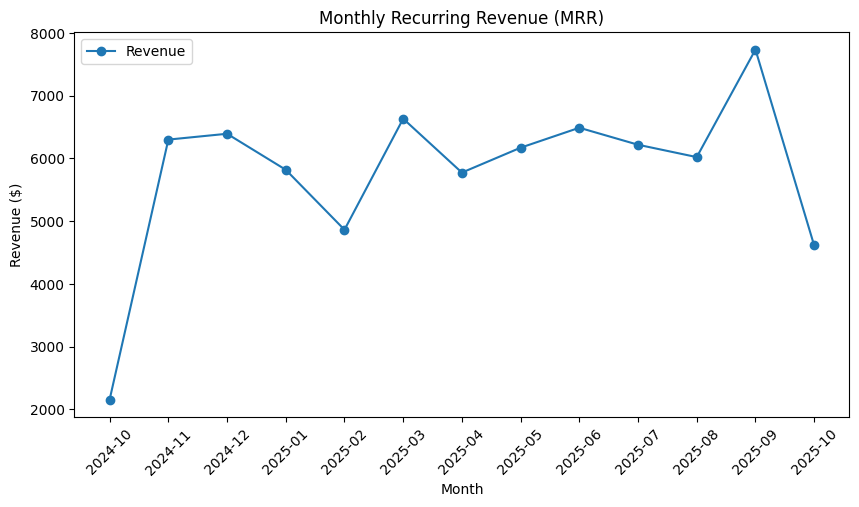

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(mrr['month'].astype(str), mrr['amount'], marker='o', label='Revenue')
plt.title("Monthly Recurring Revenue (MRR)")
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.legend()
plt.xticks(rotation=45)
plt.show()



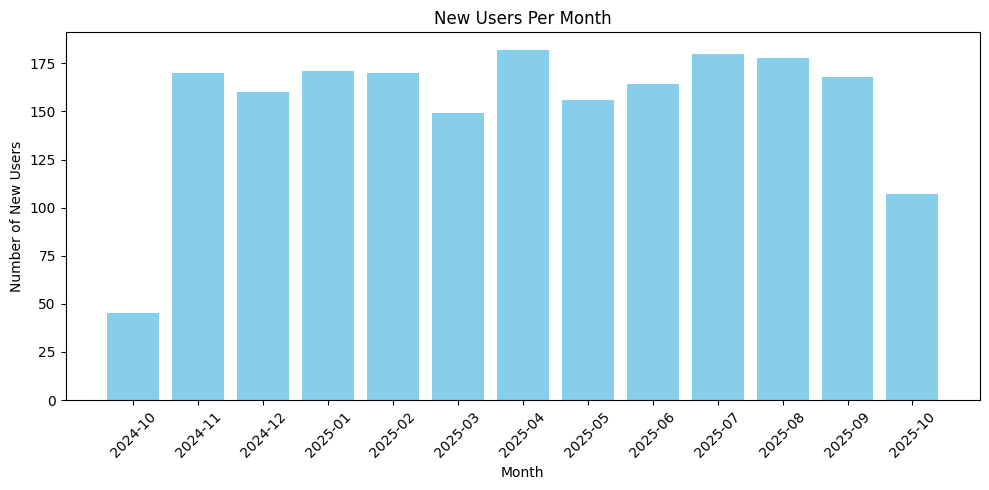

In [4]:
# Bar chart for new users
plt.figure(figsize=(10,5))
plt.bar(new_users['signup_date'].astype(str), new_users['new_users'], color='skyblue')
plt.title("New Users Per Month")
plt.xlabel("Month")
plt.ylabel("Number of New Users")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



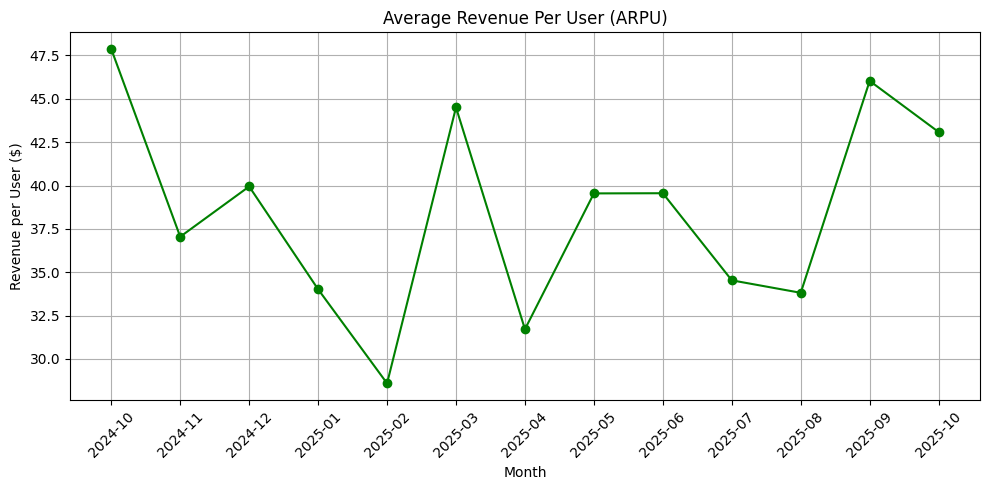

In [5]:
# Line chart for ARPU
plt.figure(figsize=(10,5))
plt.plot(arpu['month'].astype(str), arpu['arpu'], color='green', marker='o')
plt.title("Average Revenue Per User (ARPU)")
plt.xlabel("Month")
plt.ylabel("Revenue per User ($)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


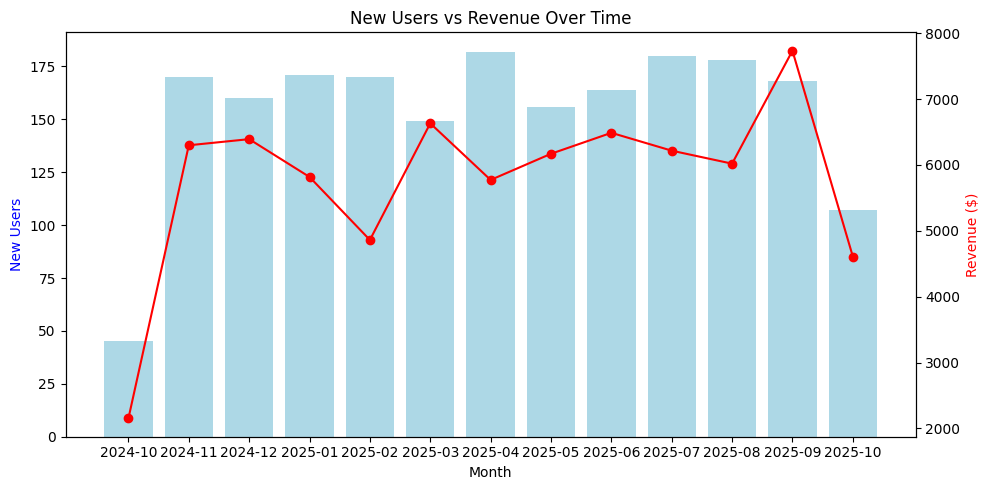

In [ ]:
#optional
fig, ax1 = plt.subplots(figsize=(10,5))

# ax1.bar(new_users['signup_date'].astype(str), new_users['new_users'], color='lightblue', label='New Users')
# ax1.set_xlabel("Month")
# ax1.set_ylabel("New Users", color='blue')

# ax2 = ax1.twinx()
# ax2.plot(mrr['month'].astype(str), mrr['amount'], color='red', marker='o', label='Revenue')
# ax2.set_ylabel("Revenue ($)", color='red')

# plt.title("New Users vs Revenue Over Time")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


In [7]:
%pip install prophet


   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
    --------------------------------------- 0.3/12.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/12.1 MB 577.4 kB/s eta 0:00:21
   - -------------------------------------- 0.5/12.1 MB 577.4 kB/s eta 0:00:21
   - -------------------------------------- 0.5/12.1 MB 577.4 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/12.1 MB 493.2 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/12.1 MB 493.2 kB/s eta 0:00:23
   -- ------------------------------------- 0.8/12.1 MB 493.2 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/12.1 MB 488.5 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/12.1 MB 488.5 kB/s eta 0:00:23
   --- ------------------------------------ 1.0/12.1 MB 488.5 kB/s eta 0:00:23
   --- -

ERROR: Could not install packages due to an OSError: [WinError 2] The system cannot find the file specified: 'c:\\Python312\\Scripts\\install_cmdstan.exe' -> 'c:\\Python312\\Scripts\\install_cmdstan.exe.deleteme'

